<a href="https://colab.research.google.com/github/mohammadRahimi1993/Exercise/blob/main/LinkPrediction_TransE%2BBert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convert Triple To Graph**

In [50]:
triples = [
    ("Alice", "knows", "Bob"),
    ("Bob", "likes", "Chocolate"),
    ("Alice", "likes", "Pizza"),
    ("Chocolate", "is", "Sweet"),
    ("Pizza", "is", "Delicious"),
    ("John", "works_at", "Microsoft"),
    ("Mary", "lives_in", "New York"),
    ("Tesla", "manufactures", "Electric_Cars"),
    ("Einstein", "developed", "Theory_of_Relativity"),
    ("Darwin", "wrote", "On_the_Origin_of_Species"),
    ("Shakespeare", "wrote", "Hamlet"),
    ("Newton", "discovered", "Gravity"),
    ("Marie_Curie", "discovered", "Radium"),
    ("Galileo", "observed", "Moons_of_Jupiter"),
    ("Leonardo_da_Vinci", "painted", "Mona_Lisa"),
    ("Van_Gogh", "painted", "Starry_Night"),
    ("Picasso", "painted", "Guernica"),
    ("Mozart", "composed", "The_Magic_Flute"),
    ("Beethoven", "composed", "Symphony_No_9"),
    ("Turing", "developed", "Turing_Machine"),
    ("Jobs", "co-founded", "Apple"),
    ("Gates", "co-founded", "Microsoft"),
    ("Musk", "founded", "SpaceX"),
    ("Zuckerberg", "founded", "Facebook"),
    ("Google", "developed", "Android"),
    ("Amazon", "sells", "Books"),
    ("NASA", "launched", "Apollo_11"),
    ("Ronaldo", "plays_for", "Manchester_United"),
    ("Messi", "plays_for", "Paris_Saint_Germain"),
    ("Federer", "won", "Wimbledon"),
    ("Nadal", "won", "French_Open"),
    ("Serena_Williams", "won", "US_Open"),
    ("Jordan", "played_for", "Chicago_Bulls"),
    ("LeBron", "plays_for", "Lakers"),
    ("Brady", "plays_for", "Buccaneers"),
    ("Einstein", "born_in", "Germany"),
    ("Curie", "born_in", "Poland"),
    ("Tesla", "born_in", "Croatia"),
    ("Newton", "born_in", "England"),
    ("Leonardo_da_Vinci", "born_in", "Italy"),
    ("Picasso", "born_in", "Spain"),
    ("Mozart", "born_in", "Austria"),
    ("Shakespeare", "born_in", "England"),
    ("Beethoven", "born_in", "Germany"),
    ("Galileo", "born_in", "Italy"),
    ("Jobs", "born_in", "USA"),
    ("Gates", "born_in", "USA"),
    ("Musk", "born_in", "South_Africa"),
    ("Zuckerberg", "born_in", "USA"),
    ("Einstein", "received", "Nobel_Prize"),
    ("Alice", "knows", "Bob"),
    ("Bob", "likes", "Chocolate"),
    ("Alice", "likes", "Pizza"),
    ("Chocolate", "is", "Sweet"),
    ("Pizza", "is", "Delicious"),
    ("John", "works_at", "Microsoft"),
    ("Mary", "lives_in", "New York"),
    ("Tesla", "manufactures", "Electric Cars"),
    ("Einstein", "developed", "Theory of Relativity"),
    ("Darwin", "wrote", "On the Origin of Species"),
    ("Alice", "knows", "Bob"),
    ("Bob", "likes", "Chocolate"),
    ("Alice", "likes", "Pizza"),
    ("Chocolate", "is", "Sweet"),
    ("Pizza", "is", "Delicious"),
    ("John", "works_at", "Microsoft"),
    ("Mary", "lives_in", "New York"),
    ("Tesla", "manufactures", "Electric Cars"),
    ("Einstein", "developed", "Theory of Relativity"),
    ("Darwin", "wrote", "On the Origin of Species"),
]

Nodes: [('Alice', {}), ('Bob', {}), ('Chocolate', {}), ('Pizza', {}), ('Sweet', {}), ('Delicious', {}), ('John', {}), ('Microsoft', {}), ('Mary', {}), ('New York', {}), ('Tesla', {}), ('Electric_Cars', {}), ('Einstein', {}), ('Theory_of_Relativity', {}), ('Darwin', {}), ('On_the_Origin_of_Species', {}), ('Shakespeare', {}), ('Hamlet', {}), ('Newton', {}), ('Gravity', {}), ('Marie_Curie', {}), ('Radium', {}), ('Galileo', {}), ('Moons_of_Jupiter', {}), ('Leonardo_da_Vinci', {}), ('Mona_Lisa', {}), ('Van_Gogh', {}), ('Starry_Night', {}), ('Picasso', {}), ('Guernica', {}), ('Mozart', {}), ('The_Magic_Flute', {}), ('Beethoven', {}), ('Symphony_No_9', {}), ('Turing', {}), ('Turing_Machine', {}), ('Jobs', {}), ('Apple', {}), ('Gates', {}), ('Musk', {}), ('SpaceX', {}), ('Zuckerberg', {}), ('Facebook', {}), ('Google', {}), ('Android', {}), ('Amazon', {}), ('Books', {}), ('NASA', {}), ('Apollo_11', {}), ('Ronaldo', {}), ('Manchester_United', {}), ('Messi', {}), ('Paris_Saint_Germain', {}), ('Fe

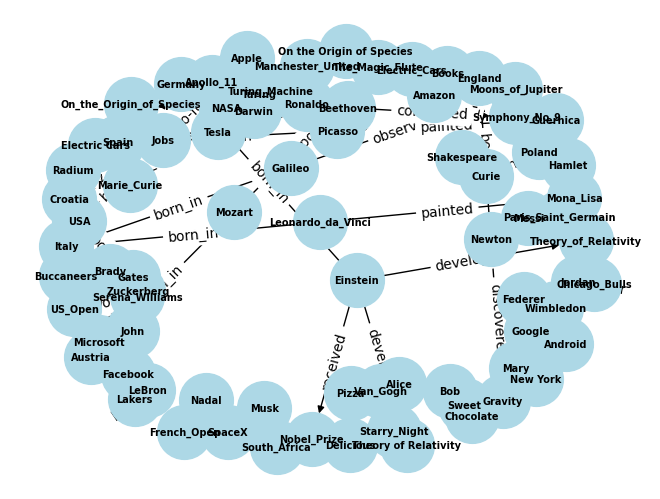

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

# ایجاد یک گراف جهت‌دار
G = nx.DiGraph()

# triples = [
#     ("Alice", "knows", "Bob"),
#     ("Bob", "likes", "Chocolate"),
#     ("Alice", "likes", "Pizza"),
#     ("Chocolate", "is", "Sweet"),
#     ("Pizza", "is", "Delicious"),
#     ("John", "works_at", "Microsoft"),
#     ("Mary", "lives_in", "New York")
# ]

# ("John", "knows", "Alice")

# افزودن سه‌تایی‌ها به عنوان نودها و لبه‌ها
for head, relation, tail in triples:
    G.add_node(head)
    G.add_node(tail)
    G.add_edge(head, tail, relation=relation)

# نمایش اطلاعات گراف
print("Nodes:", G.nodes(data=True))
print("Edges:", G.edges(data=True))

# رسم گراف
pos = nx.spring_layout(G)  # تعیین موقعیت نودها
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="lightblue", font_size=7, font_weight="bold", arrows=True)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

**TrusductiveLinkPrediction = TransE + Bert**

In [58]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
from torch import nn, optim
from sklearn.metrics import accuracy_score
from IPython.display import clear_output

# بارگذاری مدل و توکنایزر BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()
    clear_output()

# تعبیه‌سازی سه‌تایی‌ها
entity_embeddings = {}
relation_embeddings = {}

for head, relation, tail in triples:
    if head not in entity_embeddings:
        entity_embeddings[head] = get_embeddings(head)
    if tail not in entity_embeddings:
        entity_embeddings[tail] = get_embeddings(tail)
    if relation not in relation_embeddings:
        relation_embeddings[relation] = get_embeddings(relation)

# تعریف مدل TransE
class TransE(nn.Module):
    def __init__(self, embedding_dim):
        super(TransE, self).__init__()
        self.linear = nn.Linear(embedding_dim, embedding_dim)
        self.embedding_dim = embedding_dim

    def forward(self, head_emb, relation_emb, tail_emb, mode='train'):
        head_emb = self.linear(head_emb)
        relation_emb = self.linear(relation_emb)
        tail_emb = self.linear(tail_emb)

        if mode == 'train':
            return head_emb + relation_emb - tail_emb
        else:
            return torch.norm(head_emb + relation_emb - tail_emb, p=2, dim=1)

def loss_function(pos_score, neg_score, margin=1.0):
    return torch.sum(torch.relu(pos_score - neg_score + margin))

def convert_to_tensor(embeddings):
    return {k: torch.tensor(v, dtype=torch.float32) for k, v in embeddings.items()}

entity_tensors = convert_to_tensor(entity_embeddings)
relation_tensors = convert_to_tensor(relation_embeddings)

# ایجاد مدل
embedding_dim = 768  # اندازه تعبیه‌های BERT
model = TransE(embedding_dim)

optimizer = optim.Adam(model.parameters(), lr=0.01)
num_epochs = 100

# آموزش مدل
for epoch in range(num_epochs):
    epoch_loss = 0
    for head, relation, tail in triples:
        head_emb = entity_tensors[head]
        relation_emb = relation_tensors[relation]
        tail_emb = entity_tensors[tail]

        # ایجاد سه‌تایی‌های منفی
        neg_tail = np.random.choice(list(entity_tensors.keys()))
        neg_tail_emb = entity_tensors[neg_tail]

        pos_score = model(head_emb, relation_emb, tail_emb)
        neg_score = model(head_emb, relation_emb, neg_tail_emb)

        loss = loss_function(pos_score, neg_score)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

# ارزیابی مدل
def evaluate_model(model, triples, entity_tensors, relation_tensors):
    model.eval()
    with torch.no_grad():
        y_true = []
        y_pred = []

        for head, relation, tail in triples:
            head_emb = entity_tensors[head]
            relation_emb = relation_tensors[relation]
            tail_emb = entity_tensors[tail]

            pos_score = model(head_emb, relation_emb, tail_emb, mode='eval').item()
            neg_tail = np.random.choice(list(entity_tensors.keys()))
            neg_tail_emb = entity_tensors[neg_tail]
            neg_score = model(head_emb, relation_emb, neg_tail_emb, mode='eval').item()

            y_true.append(1)
            y_pred.append(1 if pos_score < neg_score else 0)

        accuracy = accuracy_score(y_true, y_pred)
        print(f'Accuracy: {accuracy:.4f}')

evaluate_model(model, triples, entity_tensors, relation_tensors)

# پیش‌بینی پیوند ناموجود
def predict_link(model, head, relation, tail):
    head_emb = entity_tensors[head]
    relation_emb = relation_tensors[relation]
    tail_emb = entity_tensors[tail]

    score = model(head_emb, relation_emb, tail_emb, mode='eval').item()
    return score

# سه‌تایی جدید برای پیش‌بینی
new_triple = ("John", "knows", "Alice")
score = predict_link(model, new_triple[0], new_triple[1], new_triple[2])
print(f'Score for the new triple {new_triple}: {score}')

Epoch 10/100, Loss: 62401.9230
Epoch 20/100, Loss: 77547.2634
Epoch 30/100, Loss: 50921.5192
Epoch 40/100, Loss: 58512.9626
Epoch 50/100, Loss: 38431.1765
Epoch 60/100, Loss: 58634.8939
Epoch 70/100, Loss: 88035.1962
Epoch 80/100, Loss: 58321.9276
Epoch 90/100, Loss: 80845.8026
Epoch 100/100, Loss: 55160.1769
Accuracy: 0.2857
Score for the new triple ('John', 'knows', 'Alice'): 210.3758544921875


**TransductiveLinkPrediction=Pykeen+TransE**

In [ ]:
!pip install pykeen

In [54]:
from pykeen.pipeline import pipeline
import pandas as pd
from pykeen.triples import TriplesFactory
import torch
from IPython.display import clear_output

subjects = []
predicates = []
objects = []

# تعریف کردن Subject ، Object , Predicates
for head, relation, tail in triples:
  subjects.append(head)
  predicates.append(relation)
  objects.append(tail)

# Create a dataframe
df = pd.DataFrame({'subject': subjects,
                   'predicate': predicates,
                   'object': objects})

# Assuming your dataframe has columns 'subject', 'predicate', 'object'
triples_factory = TriplesFactory.from_labeled_triples(
    triples=df[['subject', 'predicate', 'object']].values,
)

# تنظیمات آموزش مدل
result = pipeline(
    model='TransE',
    training=triples_factory,
    testing=triples_factory,
    training_loop='slcwa',
    training_kwargs=dict(num_epochs=100, batch_size=32),
    optimizer='Adam',
    optimizer_kwargs=dict(lr=0.01),
    negative_sampler='basic',
    negative_sampler_kwargs=dict(num_negs_per_pos=1),
)

# نمایش دادن سه‌تایی‌ها
triples_factory.triples

# پاک کردن خروجی‌های سلول
clear_output()

# ذخیره مدل آموزش‌داده‌شده
model = result.model

# تعریف یک سه‌تایی جدید برای پیش‌بینی پیوند
new_triple = ("John", "knows", "Alice")

# تبدیل موجودیت‌ها و روابط به شناسه‌های عددی
head_id = result.training.entity_to_id[new_triple[0]]
relation_id = result.training.relation_to_id[new_triple[1]]
tail_id = result.training.entity_to_id[new_triple[2]]

# ایجاد hrt_batch
hrt_batch = torch.tensor([[head_id, relation_id, tail_id]])

# پیش‌بینی نمره پیوند برای سه‌تایی جدید
score = model.predict_hrt(hrt_batch)
print(f'Score for the new triple {new_triple}: {score.item()}')

Score for the new triple ('John', 'knows', 'Alice'): -11.02103328704834
